In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:

# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
# Check if GPU is available and configure memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is available and configured!")
    except RuntimeError as e:
        print(f"Failed to set memory growth: {e}")
else:
    print("No GPU found!")

GPU is available and configured!


In [4]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

# Update the paths based on the output of the above line
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'train')
# Assuming 'the_wildfire_dataset_2n_version' is a subdirectory in the downloaded path and contains 'train'
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version', 'test')

# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Path to dataset files: /kaggle/input/the-wildfire-dataset
Number of Classes: 2
Classes: ['nofire', 'fire']


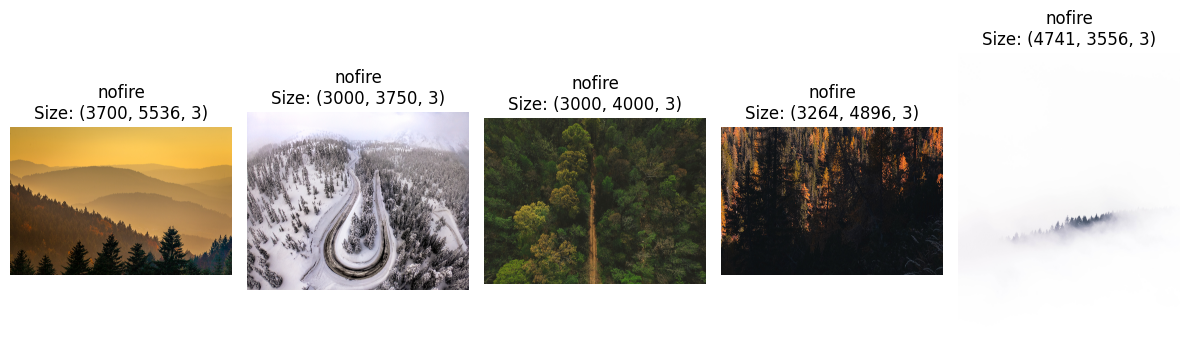

In [6]:
# Visualize sample images from the dataset
plt.figure(figsize=(12, 10))
# Assign 'classes' to 'class_labels'
class_labels = classes
sample_class_dir = os.path.join(train_dir, class_labels[0])
sample_images = os.listdir(sample_class_dir)[:5]

for index, image_file in enumerate(sample_images):
    image_path = os.path.join(sample_class_dir, image_file)
    image = plt.imread(image_path)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image)
    plt.title(f'{class_labels[0]}\nSize: {image.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

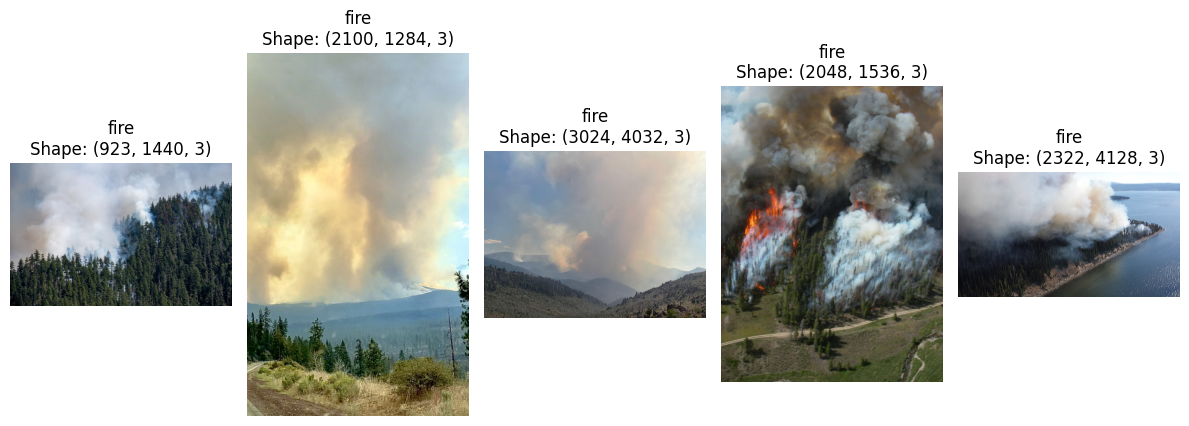

In [7]:
# Show first 5 images from the second class in the training dataset
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

target_class = classes[1]
target_path = os.path.join(train_dir, target_class)

image_names = os.listdir(target_path)[:5]

for index, image_name in enumerate(image_names):
    image_full_path = os.path.join(target_path, image_name)
    image_data = plt.imread(image_full_path)

    plt.subplot(1, 5, index + 1)
    plt.imshow(image_data)
    plt.title(f'{target_class}\nShape: {image_data.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Image preprocessing configuration
image_size = (150, 150)
batch_sz = 32  # Number of images per batch

# Define data rescaling for all sets
rescale_gen = ImageDataGenerator(rescale=1.0 / 255)

# Training data loader
train_loader = rescale_gen.flow_from_directory(
    directory=train_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)

# Validation data loader
validation_loader = rescale_gen.flow_from_directory(
    directory=val_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)

# Testing data loader
test_loader = rescale_gen.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    batch_size=batch_sz,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
# Retrieve and display class labels from the training loader
label_map = train_loader.class_indices
# print(label_map)
labels = list(label_map.keys())
print("Classes found:", labels)

Classes found: ['fire', 'nofire']


In [10]:
# Construct an alternative CNN model
model = Sequential()

# Input and first convolutional block
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture summary
print("Model Summary:")
model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# train the model
history = model.fit(
    train_loader, # Changed 'train_generator' to 'train_loader'
    steps_per_epoch = train_loader.samples // batch_sz, # Changed 'train_generator' to 'train_loader' and 'batch_size' to 'batch_sz'
    epochs = 12,
    validation_data = validation_loader, # Changed 'val_generator' to 'validation_loader'
    validation_steps = validation_loader.samples // batch_sz # Changed 'val_generator' to 'validation_loader' and 'batch_size' to 'batch_sz'
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
22/58 ━━━━━━━━━━━━━━━━━━━━ 4:09 7s/step - accuracy: 0.5335 - loss: 0.9780

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


48/58 ━━━━━━━━━━━━━━━━━━━━ 1:07 7s/step - accuracy: 0.5921 - loss: 0.8233

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 511s 9s/step - accuracy: 0.6078 - loss: 0.7887 - val_accuracy: 0.7266 - val_loss: 0.5415
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6562 - loss: 0.5616

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6562 - loss: 0.5616 - val_accuracy: 0.7109 - val_loss: 0.5554
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 560s 9s/step - accuracy: 0.7321 - loss: 0.5250 - val_accuracy: 0.7552 - val_loss: 0.4534
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7188 - loss: 0.5296 - val_accuracy: 0.7604 - val_loss: 0.4505
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 458s 8s/step - accuracy: 0.7837 - loss: 0.4567 - val_accuracy: 0.7578 - val_loss: 0.4714
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6875 - loss: 0.6155 - val_accuracy: 0.7969 - val_loss: 0.4680
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 452s 8s/step - accuracy: 0.7824 - loss: 0.4371 - val_accuracy: 0.7656 - val_loss: 0.4507
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8125 - loss: 0.4080 - val_accuracy: 0.7708 - val_loss: 0.4477
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 450s 8s/step - accuracy: 0.8106 - loss: 0.4229 - val_accuracy: 0.7708 - val_loss: 0.453

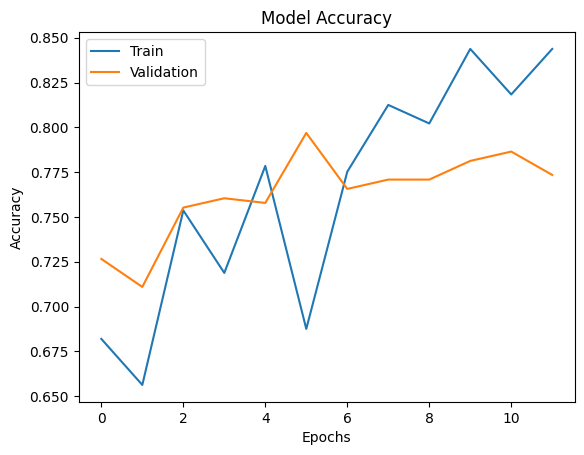

In [13]:

# Evaluate the model - plotting training and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

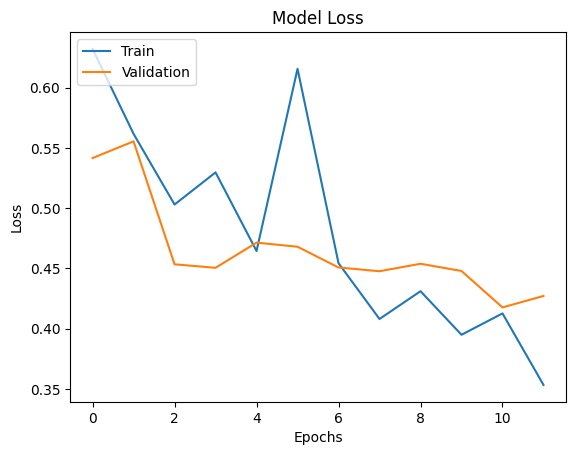

In [14]:
# Evaluate the model - plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# Evaluate the model using test data
test_loss, test_acc = model.evaluate(test_loader, steps=test_loader.samples // batch_sz) # Changed 'test_generator' to 'test_loader' and 'batch_size' to 'batch_sz'
print(f'Test Accuracy: {test_acc:.4f}')

 1/12 ━━━━━━━━━━━━━━━━━━━━ 1:01 6s/step - accuracy: 0.6562 - loss: 0.5092

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 4/12 ━━━━━━━━━━━━━━━━━━━━ 1:04 8s/step - accuracy: 0.7363 - loss: 0.4362

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 5/12 ━━━━━━━━━━━━━━━━━━━━ 1:00 9s/step - accuracy: 0.7491 - loss: 0.4203

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 8s/step - accuracy: 0.7752 - loss: 0.3955
Test Accuracy: 0.7891


In [16]:
# Save the model
model.save('FFD.keras')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()


In [18]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

In [19]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

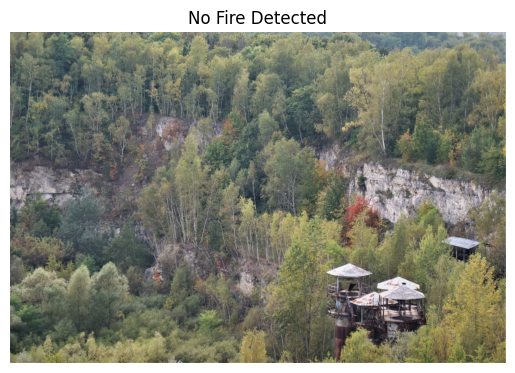

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/chris-linnett-FatkDF8j3pk-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

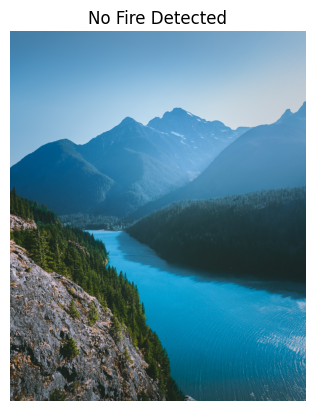

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/darpan-WwegI5jjJ4c-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

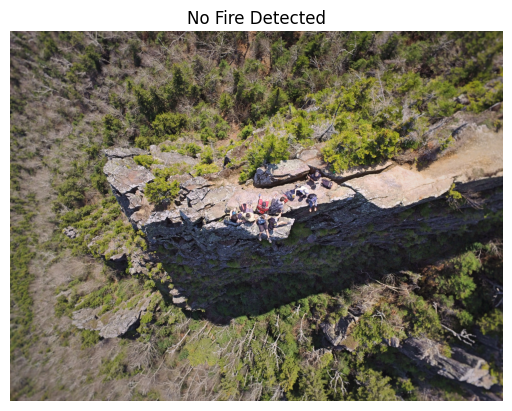

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/nicolas-cool-kG2uTD1KxYI-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()


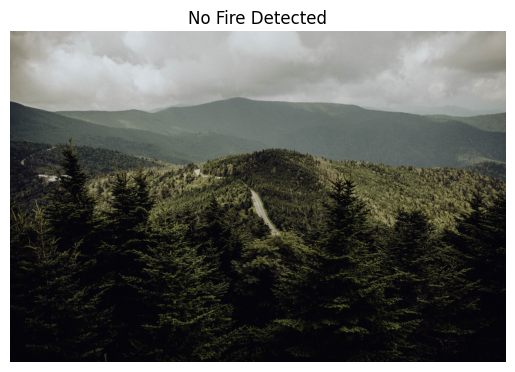

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/calvin-craig-MLf4-0_k-P8-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

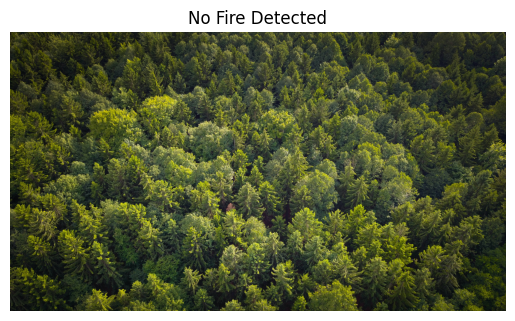

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/raphael-biscaldi-Ux_6dqF8WiQ-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

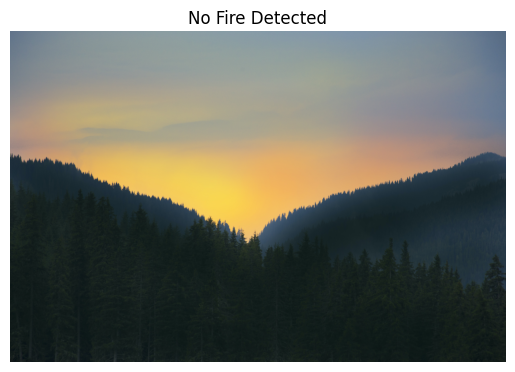

In [25]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "No Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/andrei-p-Sc_jhFDkqQc-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

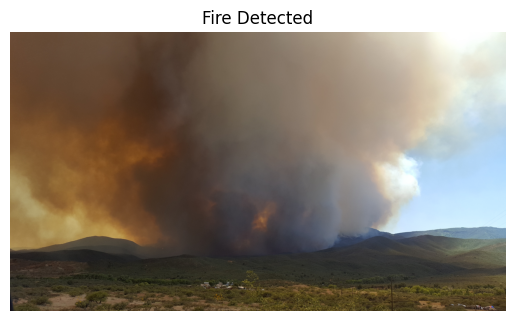

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path for a fire example
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/34957472404_14d39d5c12_o.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()


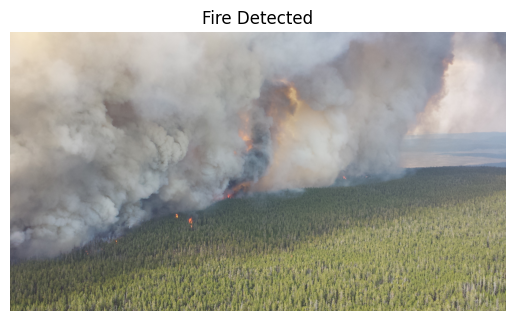

In [27]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/9573568070_ec00ce554d_o.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

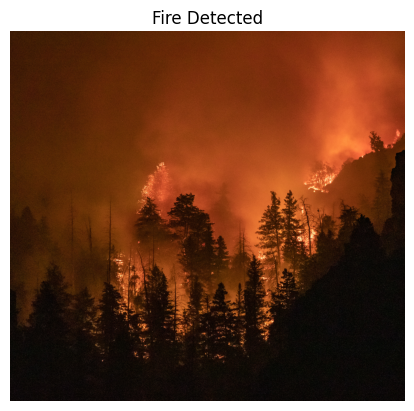

In [28]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/50229336772_7f5719786b_o.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

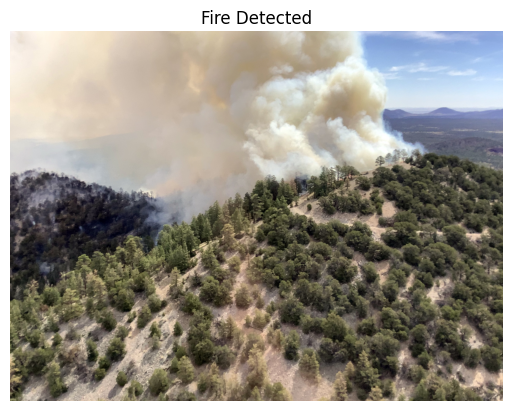

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/51233526390_1d23dbc6b5_o.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

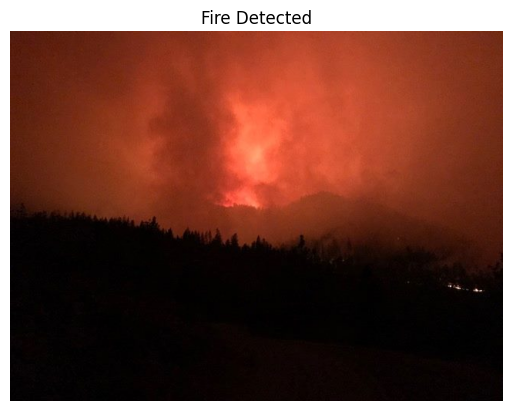

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/41870900650_fb240bb4ac_o.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

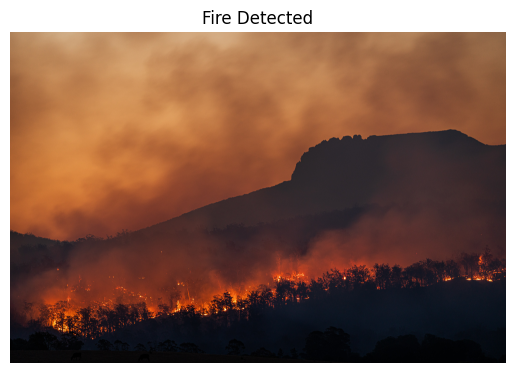

In [31]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming predict_fire returns the prediction label or result
def predict_fire(image_path):
    # Dummy function - replace with your actual model's predict function
    return "Fire Detected"

# Image path
image_path = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/matt-palmer-kbTp7dBzHyY-unsplash.jpg'

# Load and show the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(predict_fire(image_path))  # Show prediction result as title
plt.show()

In [32]:
print('Thank you sir ')

Thank you sir 


In [33]:
print(' Project Submitted by Shakti Prasad Mohanty')

 Project Submitted by Shakti Prasad Mohanty
